## load Structure and Model

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Aug  5 22:38:51 2019

@author: Jones
"""

"""
Consider complex input
"""
import numpy as np
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D,Conv1D, MaxPooling2D, MaxPooling1D, Flatten, ZeroPadding2D, ZeroPadding1D
from keras.optimizers import SGD, Adam
import os
import matplotlib.pyplot as plt
import time
from tqdm import tnrange, tqdm_notebook
import pandas as pd
import tensorflow as tf
#%matplotlib inline

working_dir = os.getcwd()
#gen_folder_path = os.path.join(working_dir, 'gen_folder')
#gen_folder_path = os.path.join(working_dir, 'NONORM_gen_folder')
#gen_folder_path = os.path.join(working_dir, 'NONORM_42ppm_gen_folder')
gen_folder_path = os.path.join(working_dir, 'NONORM_42ppm_lesssnr_gen_folder')

'''

#del model

model = Sequential()

input_shape_num = 774
k = 1000#total lines
#height x width x channel x array = input_shape_num, 1,1,k

block_1_filter_num = 32
conv_filter_size = 15

############block 1###############
#要怎麼padding 應該是要CONV前先PADDING 但是一開始不能餵給他 input shape 到底??

model.add(Conv2D(filters=block_1_filter_num, kernel_size=(15,1), strides=1, input_shape=(input_shape_num,1,2)))
model.add(BatchNormalization(scale=False, center=False))#?????
model.add(Activation('relu'))

model.add(ZeroPadding2D(padding = (7,0)))
model.add(Conv2D(filters=block_1_filter_num, kernel_size=(15,1), strides=1))
model.add(BatchNormalization(scale=False, center=False))#?????
model.add(Activation('relu'))

model.add(ZeroPadding2D(padding = (7,0)))
model.add(Conv2D(filters=block_1_filter_num, kernel_size=(15,1), strides=1))
model.add(BatchNormalization(scale=False, center=False))#?????
model.add(Activation('relu'))

model.add(ZeroPadding2D(padding = (7,0)))
model.add(Conv2D(filters=block_1_filter_num, kernel_size=(15,1), strides=1))
model.add(BatchNormalization(scale=False, center=False))#?????
model.add(Activation('relu'))
model.add(MaxPooling2D((2,1)))#Why not 1D?

############block 2###############
block_2_filter_num = 64
for nrep in range(4):
    model.add(ZeroPadding2D(padding = (7,0)))
    model.add(Conv2D(filters=block_2_filter_num, kernel_size=(15,1), strides=1))
    model.add(BatchNormalization(scale=False, center=False))#?????
    model.add(Activation('relu'))
model.add(MaxPooling2D((2,1)))#Why not 1D?
############block 3###############
block_3_filter_num = 128
for nrep in range(4):
    model.add(ZeroPadding2D(padding = (7,0)))
    model.add(Conv2D(filters=block_3_filter_num, kernel_size=(15,1), strides=1))
    model.add(BatchNormalization(scale=False, center=False))#?????
    model.add(Activation('relu'))

###########FC, Regression##############
model.add(Flatten())
#model.add(Dense(837))
model.add(Dense(input_shape_num*2, activation = "linear"))
model.summary()
#sgdm = SGD(lr=3e-8, momentum= 0.8)
sgdm = SGD(lr=3e-3, momentum= 0.8, decay=1.0291e-4)
model.compile(loss = 'mse', optimizer=sgdm,  metrics=['mape'])
'''

Using TensorFlow backend.


'\n\n#del model\n\nmodel = Sequential()\n\ninput_shape_num = 774\nk = 1000#total lines\n#height x width x channel x array = input_shape_num, 1,1,k\n\nblock_1_filter_num = 32\nconv_filter_size = 15\n\n############block 1###############\n#要怎麼padding 應該是要CONV前先PADDING 但是一開始不能餵給他 input shape 到底??\n\nmodel.add(Conv2D(filters=block_1_filter_num, kernel_size=(15,1), strides=1, input_shape=(input_shape_num,1,2)))\nmodel.add(BatchNormalization(scale=False, center=False))#?????\nmodel.add(Activation(\'relu\'))\n\nmodel.add(ZeroPadding2D(padding = (7,0)))\nmodel.add(Conv2D(filters=block_1_filter_num, kernel_size=(15,1), strides=1))\nmodel.add(BatchNormalization(scale=False, center=False))#?????\nmodel.add(Activation(\'relu\'))\n\nmodel.add(ZeroPadding2D(padding = (7,0)))\nmodel.add(Conv2D(filters=block_1_filter_num, kernel_size=(15,1), strides=1))\nmodel.add(BatchNormalization(scale=False, center=False))#?????\nmodel.add(Activation(\'relu\'))\n\nmodel.add(ZeroPadding2D(padding = (7,0)))\nmodel.ad

In [2]:
import time
from tqdm import tnrange, tqdm_notebook
import pandas as pd
######################################
# Load conc. table
######################################
rd = np.load(os.path.join(working_dir,'42ppm_base_basis_set.npz'))
base_basis_set = rd['data']

brain_betabo_conc_table_path = os.path.join(gen_folder_path, 'brain_betabo_conc_table_df')
brain_betabo_conc_table_files = [ f for f in os.listdir(brain_betabo_conc_table_path) if os.path.isfile(os.path.join(brain_betabo_conc_table_path,f)) ]

brain_conc_set = []

for idx in tqdm_notebook(brain_betabo_conc_table_files[:2]):
    read_data= pd.read_pickle(os.path.join(brain_betabo_conc_table_path, idx))
    read_data.set_index("names" , inplace=True)
    brain_conc_set.append(read_data['conc'])
print('brain_conc_set',(brain_conc_set[0]))

np_brain_conc_set = np.array(brain_conc_set)


HBox(children=(IntProgress(value=0, max=2), HTML(value='')))


brain_conc_set names
Ala        1.149717
Asp        1.730295
Cr         5.799690
GABA       1.565781
Glc        1.102522
Gln        4.582374
Glu       11.108091
GPC        0.840129
PCh        0.681081
Lac        0.559380
mI         8.707532
NAA       11.141474
NAAG       1.966923
Scyllo     0.000000
Tau        4.473207
Name: conc, dtype: float64


In [4]:
keras.backend.clear_session()

from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4
set_session(tf.Session(config=config))

from keras.models import load_model
#Use it if model had been trained
#model = load_model('Oct-23-2019.h5')#stable ver.
#model = load_model('Oct-30-2019.h5')#contain PCh training data weighting, but predict result seems bad?
#model = load_model('Oct-31-2019.h5')#Zero center Normalized data weighting
#model = load_model('Nov-01-2019.h5')# Add more FC layer
#model = load_model('Nov-02-2019.h5')# ajjust simulated data for random
#model = load_model('Nov-03-2019.h5')# ajjust simulated data for random, epoch 150
#model = load_model('Nov-04-2019_epoch90.h5')#adjust NAAG
#model = load_model('Nov-07-2019.h5')#ppm4.2 + norm x
#model = load_model('Nov-12-2019.h5')#global_norm_modify boarden t2, MM
#model = load_model('Nov-17-2019.h5')#global_norm_modify boarden t2, MM, SNR
#model = load_model('Nov-18-2019.h5')#local_norm_modify boarden t2, MM, SNR
model = load_model('Nov-22-2019.h5')#universal norm(same norm)

In [5]:
def measure_width_hz(ppm, spectrum_data):
    if (spectrum_data.ndim == 2):
        spectrum_data = spectrum_data[:,0]
    tNAA_pos = np.where((ppm>=1.8) & (ppm<=2.2))
    tNAA_crop = spectrum_data[tNAA_pos]
    #tNAA_FWHM_val = max(tNAA_crop)*0.2
    tNAA_FWHM_val = max(tNAA_crop)*(1-0.707)
    tNAA_FWHM = np.where(tNAA_crop > tNAA_FWHM_val)
    tNAA_FWHM_width_ppm = max(ppm[tNAA_pos][tNAA_FWHM])-min(ppm[tNAA_pos][tNAA_FWHM])
    #ppm to Hz, (BW)/(total ppm = BW/B) * width_ppm = B*width_ppm
    tNAA_FWHM_width_hz = round(123.177*tNAA_FWHM_width_ppm, 3)
    return tNAA_FWHM_width_hz

def freq_shift_corr(ppm, spectrum_data):
    #print('spectrum_data.shape',spectrum_data.shape)
    tNAA_pos = np.where((ppm>=1.5) & (ppm<=2.5))
    NAA_peak_pos = np.array(np.where((spectrum_data == max(spectrum_data[tNAA_pos]))))[0]
    if len(NAA_peak_pos) > 1:
        NAA_peak_pos = int(NAA_peak_pos[0])
    ppm_2 = (np.abs(ppm - 2.0)).argmin()#The number was the cloest one to 2 ppm
    diff = NAA_peak_pos - ppm_2
    shift_point = NAA_peak_pos - ppm_2
    shift_correction = np.roll(spectrum_data,-shift_point)
    return shift_correction

def cal_area(ppm, spectrum):
    spectrum_max = spectrum.real.max()
    area_threadshold = spectrum_max*(1-0.99)
    area_pos_range = np.where(spectrum >= area_threadshold)
    area_pos_range_byppm = np.where((ppm >= 4) & (ppm <= 5))
    print('Points in Area:',len(area_pos_range_byppm[0]))
    area_range = spectrum[area_pos_range]
    area = round(np.sum(area_range).real*abs(ppm[0]-ppm[1]), 5)#print('Area by threadshold = %E' %area)
    area_byppm = round(np.sum(spectrum[area_pos_range_byppm].real)*abs(ppm[0]-ppm[1]), 5)
    abs_area = round(np.sum(abs(area_range.real))*abs(ppm[0]-ppm[1]), 5)#Area by threadshold_ABS
    total_area = round(np.sum(spectrum).real*abs(ppm[0]-ppm[1]), 5)#All spectrum area
    total_area_abs = round(np.sum(abs(spectrum.real))*abs(ppm[0]-ppm[1]), 5)#All spectrum area ABS
    #print('ppm_gap', ppm[0]-ppm[1])
    #print('Spectrum area byppm = %E' %area_byppm)
    #plt.figure(figsize=(15,8))
    #plt.plot(211)
    #plt.title('NWS Spectrum', size = 18)
    #plt.title('Spectrum area byppm = %E' %area_byppm)
    #plt.plot(ppm,spectrum,color='gray')
    #plt.plot(ppm[area_pos_range_byppm],spectrum[area_pos_range_byppm],color='r', label='Calcuated Area')
    #plt.legend(loc='upper right')
    #plt.xlim(5.1,3.9)
    #plt.xlabel('PPM',size=12)
    #plt.ylabel('Magnitude', size=15)    
    return area_byppm

def measure_peak_phase(ppm,nws_data, corr_spectrum):
    before_corr = nws_data
    origin_peak_pos = np.argmax(before_corr.real)
    return corr_spectrum[origin_peak_pos].imag

def measure_peak_area(ppm,nws_data, corr_spectrum):
    before_corr = nws_data
    origin_peak_pos = np.argmax(before_corr.real)
    origin_peak_range = np.where((ppm >= 4) & (ppm <= 5))
    area = np.sum(corr_spectrum[origin_peak_range].real)*abs(ppm[0]-ppm[1])
    return area

###########################Zero-phase correction###########################
def zero_phase_corr(nws_data):    
    FT_M = np.abs(nws_data)
    FT_P = np.angle(nws_data, deg=True)
    var_phi_range = np.arange(-180, 180)
    phase_val = np.zeros([len(var_phi_range)])
    area_val = np.zeros([len(var_phi_range)])

    ######Find phase min######
    for idx, var_phi in enumerate(var_phi_range):
        angle = var_phi
        new_phase = FT_P + angle
        new_spectrum = nws_data * 0
        new_theada = new_phase * (np.pi / 180)
        new_spectrum = np.multiply(FT_M , np.cos(new_theada)) + 1j*np.multiply(FT_M , np.sin(new_theada))
        phase_val[idx] = abs(measure_peak_phase(ppm,nws_data, new_spectrum))
        area_val[idx] = measure_peak_area(ppm,nws_data, new_spectrum)
    #angle = var_phi_range[np.argmin(abs(phase_val))]
    #print('(phase_val)',(phase_val).min())
    angle = var_phi_range[np.argmax(area_val)]

    new_phase = FT_P + angle#FT_P = 52.96096145 角度
    new_theada = new_phase * (np.pi / 180)#iF angle = 0, new theada = 0.9 ..... 逕度 為了要丟下面的cos?
    #print('angle',angle)

    new_spectrum = nws_data * 0
    new_spectrum = np.multiply(FT_M , np.cos(new_theada)) + 1j*np.multiply(FT_M , np.sin(new_theada))
    return new_spectrum
###########################Zero-phase correction###########################
def ws_phase_corr(ws_data, angle):
    #print('angle',angle)    
    FT_M = np.abs(ws_data)
    FT_P = np.angle(ws_data, deg=True)
    new_phase = FT_P + angle#FT_P = 52.96096145 角度
    new_theada = new_phase * (np.pi / 180)#iF angle = 0, new theada = 0.9 ..... 逕度 為了要丟下面的cos?
    new_spectrum = ws_data * 0
    new_spectrum = np.multiply(FT_M , np.cos(new_theada)) + 1j*np.multiply(FT_M , np.sin(new_theada))
    return new_spectrum

# In Vivo data: GongYJ: DLPFC, M1, 

## Read .npz data

files ['nws_DLPFC1.npz', 'nws_DLPFC2.npz', 'nws_DLPFC3.npz', 'nws_DLPFC4.npz', 'nws_DLPFC5.npz', 'ws_DLPFC1.npz', 'ws_DLPFC2.npz', 'ws_DLPFC3.npz', 'ws_DLPFC4.npz', 'ws_DLPFC5.npz']


HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "



ws_datasets (5, 2048)
nws_datasets (5, 2048)
naa_cord len 68
interpo_x[0]-interpo_x[1] 0.004419963615607259


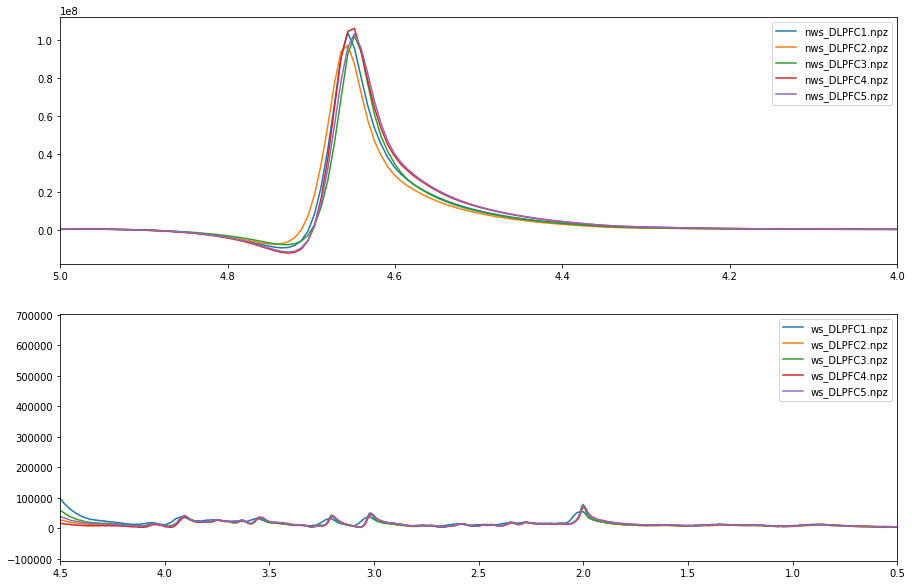

In [6]:
import time
from tqdm import tnrange, tqdm_notebook
import pandas as pd

working_dir = os.getcwd()
#phantom_to_model_path = os.path.join(working_dir, 'phantom_TR_to_model')
invivo_to_model_path = os.path.join(working_dir, 'invivo_to_model')
subject_path = os.path.join(invivo_to_model_path, 'GongYJ')
#subject_path = os.path.join(invivo_to_model_path, 'PengBY')

region_path = os.path.join(subject_path, 'DLPFC')
#region_path = os.path.join(subject_path, 'M1')
#region_path = os.path.join(subject_path, 'VC')

ws_datasets = np.zeros((5,2048,),dtype=np.csingle)
nws_datasets = np.zeros((5,2048,),dtype=np.csingle)

#files = [ f for f in sorted(os.listdir(DLPFC_path), key=lambda x: x[5]) if os.path.isfile(os.path.join(DLPFC_path,f)) ]
files = [ f for f in sorted(os.listdir(region_path), key=lambda x: x[0]) if os.path.isfile(os.path.join(region_path,f)) ]
print('files',files)


plt.figure(figsize=(15,10))
for idx, cont in enumerate(tqdm_notebook(files)):
    if (idx < 5 ):
        read_data= np.load(os.path.join(region_path, cont))
        ppm = read_data['ppm']
        nws_data = read_data['X']
        if nws_data.ndim == 2:
            nws_data = nws_data[:,0]
        nws_datasets[idx,:] = nws_data
        plt.subplot(211)
        plt.plot(ppm, nws_data, label=files[idx])
        plt.xlim(5,4)
        plt.legend(loc='upper right')
    else:
        read_data= np.load(os.path.join(region_path, cont))
        ppm = read_data['ppm']
        ws_read_data = read_data['X']
        if ws_read_data.ndim == 2:
            ws_read_data = ws_read_data[:,0]
        ws_datasets[idx-5,:] = ws_read_data
        plt.subplot(212)
        plt.plot(ppm, ws_read_data, label=files[idx])
        plt.xlim(4.5,0.5)
        #plt.ylim(-1000,50000)
        plt.legend(loc='upper right')
        
print('ws_datasets',ws_datasets.shape)
print('nws_datasets',nws_datasets.shape)

##########################################Basis filter#########################################
#################To get NAA singlet 2.0 ppm Peak 1 mole Area#################
rd = np.load(os.path.join(working_dir,'42ppm_base_basis_set.npz'))
base_basis_set = rd['data']

read_data= np.load(os.path.join(region_path, files[0]))
ppm = read_data['ppm']
pos = np.where((ppm>=0.5) & (ppm<=4.2))
crop_ppm = ppm[pos]
interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],837)

brain_metabo_index =  brain_conc_set[0].index
add_metabo_index = brain_metabo_index[:-2]
add_metabo_index = list(add_metabo_index)
add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tNAA','mI/tNAA','tCho/tNAA','tCr/tNAA'])


denoise_basis_set = base_basis_set*0
#plt.figure(figsize = (15,10))
for i in range(len(base_basis_set)):
    thd = np.quantile(base_basis_set[i].real, .90)
    denoise_basis_set[i]  = base_basis_set[i]
    #denoise_basis_set[i][denoise_basis_set[i] < thd] = 0
    if i ==11:#11 = NAA
        denoise_basis_set[i] = denoise_basis_set[i]*0
        naa_cord = np.where((interpo_x>1.8)&(interpo_x<2.1))
        denoise_basis_set[i][naa_cord] = base_basis_set[i][naa_cord]
        naa_area = np.sum(denoise_basis_set[i].real)*(interpo_x[0]-interpo_x[1])
        w_area = naa_area *55556 * (2/3)
        print('naa_cord len',len(naa_cord[0]))
        print('interpo_x[0]-interpo_x[1]',interpo_x[0]-interpo_x[1])
        #print('w_area (naa_area *55556 * (2/3)) =', w_area)
    '''
    ##########Visualize spectra##########
    if i == 11:
        plt.figure(figsize=(13,10))
        plt.subplot(211)
        cal_area(ppm, abs(new_spectrum.real))
        plt.subplot(212)
        #plt.title('Original and filtered, area = %E' %(np.sum(denoise_basis_set[i].real)*(interpo_x[0]-interpo_x[1])))
        #plt.title('Calculate the singlet area in basis for simulated water signal')
        plt.title('Singlet peak in NAA basis spectrum',size=18)
        plt.plot(interpo_x,base_basis_set[i],label = add_metabo_index[i])
        plt.plot(interpo_x, denoise_basis_set[i], color='r',label = 'Caculated Area')
        #plt.xlim(interpo_x.max(),interpo_x.min())
        plt.xlim(2.3,1.8)
        plt.xlabel('PPM',size=18)
        plt.ylabel('Magnitude')
        plt.legend(loc='upper right')
    '''
##########################################Basis filter#########################################


Points in Area: 126
norm_coefficient_real 1


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


pad_ppm_idx 0
norm_NSA_64_ori[0] (4249.926+3615.44j)
len(pad_NORM_PRED) (2048, 1)


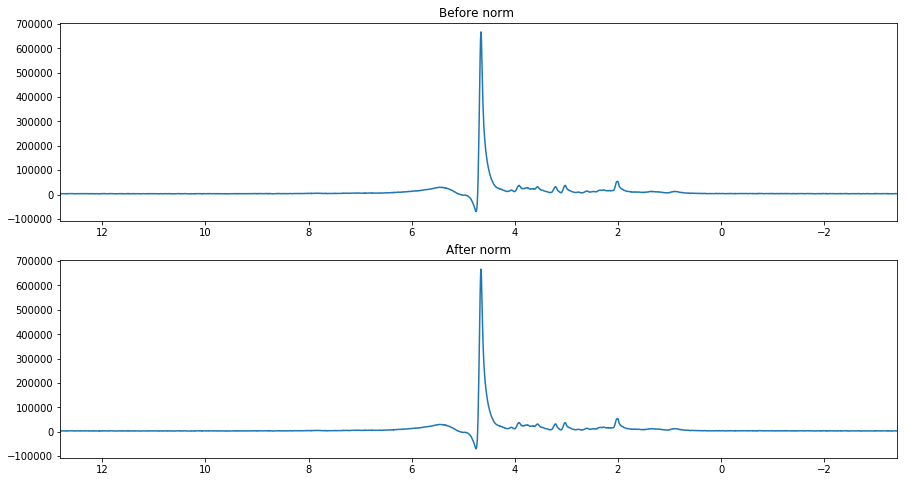

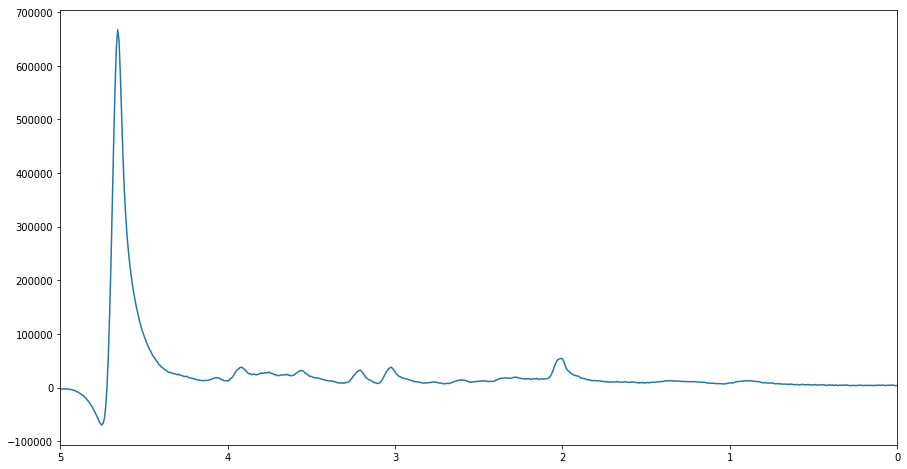

In [7]:
for cur_sel_id in range(1):
    #cur_sel_id = 2
    ws_data = ws_datasets[cur_sel_id,:]
    nws_data = nws_datasets[cur_sel_id,:]
    
    ########################算NWS 面積囉######################
    new_spectrum = zero_phase_corr(nws_data)
    abs_real_NWS_area = cal_area(ppm, abs(new_spectrum.real))
    ########################得NWS 面積########################
    
    ########################對WS修正相位囉######################
    #corr_angle = (np.angle(new_spectrum, deg=True) - np.angle(nws_data, deg=True))
    corr_angle = 0
    ws_data = ws_phase_corr(ws_data, corr_angle)    
    ########################得NWS 面積########################    


    pos = np.where((ppm>=ppm.min()) & (ppm<=ppm.max()))
    crop_ppm = ppm[pos]
    len_2048_ppm_0_5_4_5 = len(crop_ppm)
    ws_data = ws_data[pos]

    norm_coefficient_real = 1
    norm_coefficient_imag = norm_coefficient_real

    print('norm_coefficient_real',norm_coefficient_real)

    norm_NSA_64_ori = ((ws_data.real) * norm_coefficient_real) + 1j*((ws_data.imag) * norm_coefficient_imag)

    plt.figure(figsize=(15,8))
    plt.subplot(211)
    plt.title('Before norm ')
    plt.plot(crop_ppm,ws_data)
    plt.xlim(crop_ppm.max(),crop_ppm.min())

    plt.subplot(212)
    plt.title('After norm')
    plt.plot(crop_ppm,norm_NSA_64_ori)
    plt.xlim(crop_ppm.max(),crop_ppm.min())


    pad_NORM_PRED = np.zeros([2048,],dtype=np.csingle)

    ##############################################


    ppm_cord_max = crop_ppm.max()
    pad_ppm_idx = abs(ppm - ppm_cord_max).argmin()
    print('pad_ppm_idx',pad_ppm_idx)

    print('norm_NSA_64_ori[0]',norm_NSA_64_ori[0])

    pad_NORM_PRED[pad_ppm_idx:pad_ppm_idx+len(norm_NSA_64_ori)] = norm_NSA_64_ori
    pad_NORM_PRED = np.expand_dims(pad_NORM_PRED,axis=1)

    #plt.figure(figsize=(15,10))
    plt.figure(figsize=(15,8))
    plt.plot
    plt.plot(ppm,pad_NORM_PRED)
    plt.xlim(5,0)
    #print('ppm[0]-ppm[1]',ppm[0]-ppm[1])
    print('len(pad_NORM_PRED)',(pad_NORM_PRED).shape)

    # SAVE TO MAT
    working_dir = os.getcwd()
    dump_path = os.path.join(working_dir, 'try_norm_pred_lcm')
    '''
    plt.figure(figsize=(15,8))
    plt.subplot(211)
    plt.title('sdata real')
    plt.plot(ppm,pad_NORM_PRED.real)
    plt.subplot(212)
    plt.title('sdata imag')
    plt.plot(ppm,pad_NORM_PRED.imag)
    '''

    import scipy.io as sio
    sio.savemat(os.path.join(dump_path,'snr_01','ws','meas_svs.mat'), {'sdata':pad_NORM_PRED})
    # For no nws
    #sio.savemat(os.path.join(dump_path,'nonws_snr_01','ws','meas_svs.mat'), {'sdata':pad_NORM_PRED})    
    


## 選擇頻譜

Points in Area: 126


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


#####real_conc#####
Points in Area: 126
#####real_conc#####
Points in Area: 126
#####real_conc#####


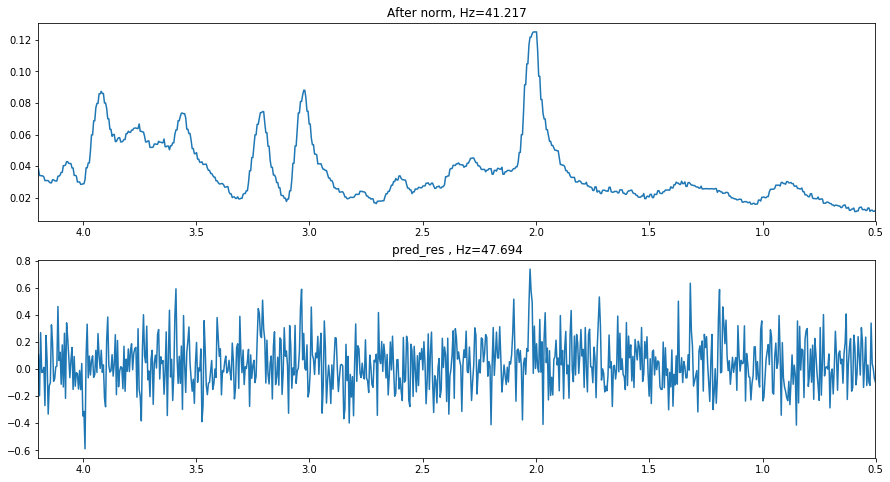

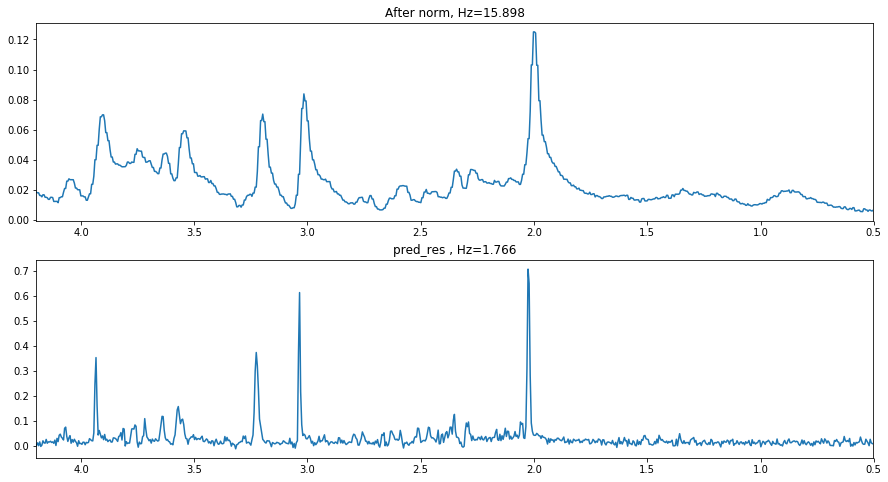

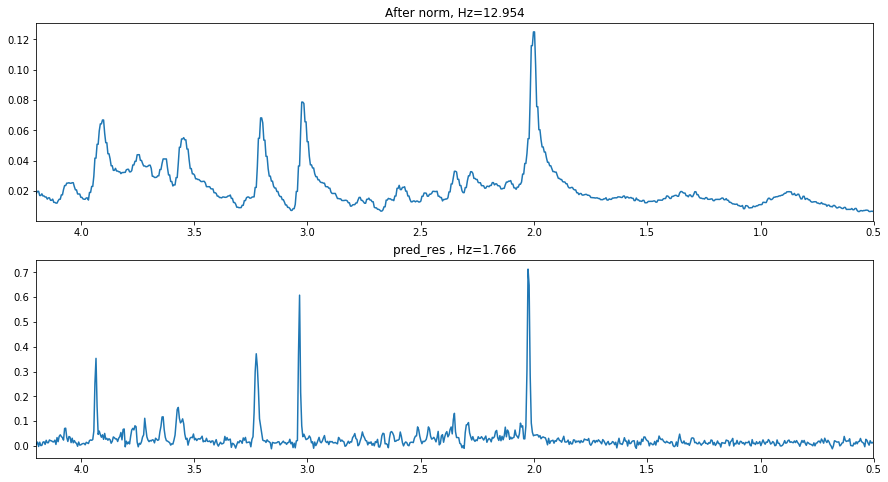

In [11]:
#measure NAA basis

#print('files',files)
for cur_sel_id in range(3):
    #cur_sel_id = 2
    ws_data = ws_datasets[cur_sel_id,:]
    nws_data = nws_datasets[cur_sel_id,:]
    
    '''
    large_42ppm = np.where(ppm>4.2)
    print(large_42ppm)
    fillinval = np.ones([len(large_42ppm)])*ws_data[large_42ppm[0]][-1]
    print(fillinval)
    ws_data[large_42ppm] = fillinval
    '''
    #print('ppm',len(ppm))
    #print('nws_data',len(nws_data))

    ########################算NWS 面積囉######################
    new_spectrum = zero_phase_corr(nws_data)
    abs_real_NWS_area = cal_area(ppm, abs(new_spectrum.real))
    ########################得NWS 面積########################
    
    ########################對WS修正相位囉######################
    #corr_angle = (np.angle(new_spectrum, deg=True) - np.angle(nws_data, deg=True))
    corr_angle = 0
    ws_data = ws_phase_corr(ws_data, corr_angle)    
    ########################得NWS 面積########################    


    #norm_coefficient_real = 1.99E+02
    #norm_coefficient_real = w_area / abs_real_NWS_area
    #norm_coefficient_real = (w_area / abs_real_NWS_area)*2
    #norm_coefficient_real = 1
    #norm_coefficient_real = np.max(w_area.real)
    #norm_coefficient_imag = np.max(w_area.imag)
    
    #print('norm_coefficient_real',norm_coefficient_real)

    pos = np.where((ppm>=0.5) & (ppm<=4.2))
    crop_ppm = ppm[pos]
    len_2048_ppm_0_5_4_5 = len(crop_ppm)
    ws_data = ws_data[pos]


    ##########################interpolation 給CNN 所以要內插到837##########################
    import scipy as scipy
    from scipy import interpolate

    x = crop_ppm
    interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],774)

    real_f = interpolate.interp1d(x,ws_data.real,kind="nearest")
    imag_f = interpolate.interp1d(x,ws_data.imag,kind="nearest")
    interpo_ws_data = real_f(interpo_x) + 1j*(imag_f(interpo_x))

    ##########################interpolation##########################
    #plt.figure(figsize=(15,8))
    #plt.subplot(211)
    #plt.title('Before norm max.peak to 2e+07')
    #plt.plot(interpo_x,interpo_ws_data)
    #plt.xlim(interpo_x.max(),interpo_x.min())
    
    norm_coefficient_real = np.max(interpo_ws_data.real)*8
    norm_coefficient_imag = norm_coefficient_real

    norm_interpo_ws_data = ((interpo_ws_data.real) / norm_coefficient_real) + 1j*((interpo_ws_data.imag) / norm_coefficient_imag)
    norm_interpo_ws_data = np.expand_dims(norm_interpo_ws_data, axis = 1)

    #plt.subplot(212)
    #plt.title('After norm ')
    #plt.plot(interpo_x,norm_interpo_ws_data)
    #plt.xlim(interpo_x.max(),interpo_x.min())
    ###############################################################################
    interpo_ws_data = np.expand_dims(interpo_ws_data, axis = 1)

    compare_norm_interpo_ws_data = np.append(interpo_ws_data, norm_interpo_ws_data,axis = 1)
    #print('compare_norm_interpo_ws_data',compare_norm_interpo_ws_data.shape)#compare_NSA64_norm (837, 2)

    X_input = np.expand_dims(compare_norm_interpo_ws_data.T,axis = 2)#NSA data
    X_input = np.expand_dims(X_input,axis = 3)
    X_input = np.append(X_input.real, X_input.imag, axis = 3)


    pred_res = model.predict(X_input, verbose=0)
    pred_res = pred_res[:,:774] + 1j*(pred_res[:,774:])
    X_input = X_input[:,:,:,0] + 1j*(X_input[:,:,:,1])

    input_name = ['Before norm', 'After norm']
    # Visualize the predicton result
    for num in range(1,2):
    #for num in range(len(X_input)):
        plt.figure(figsize=(15,8))
        plt.subplot(211)
        plt.title(f'{input_name[num]}, Hz={measure_width_hz(interpo_x, X_input[num])}')
        plt.plot(interpo_x,X_input[num])
        plt.xlim(interpo_x.max(),interpo_x.min())
        plt.subplot(212)
        #print(pred_res[num].shape)
        plt.title(f'pred_res , Hz={measure_width_hz(interpo_x, pred_res[num])}')
        plt.plot(interpo_x,pred_res[num])
        plt.xlim(interpo_x.max(),interpo_x.min())
    ###################for abtract figure############################################
    '''
    plt.figure(figsize=(15,6))
    plt.subplot(211)
    #plt.plot(interpo_x,X_input[1]*2.3,color='gray',label='Orignal spectrum')
    plt.plot(interpo_x,X_input[1]*2.1,color='k')
    #print(pred_res[num].shape)
    plt.title(f'Subject 2, Dorsal Lateral Prefrontal Cortex (DLPFC)', size = 18)
    #plt.plot(interpo_x,pred_res[1],color ='r',label='CNN prediction')
    
    plt.plot(interpo_x,pred_res[1],color ='r')
    #plt.xlim(interpo_x.max()-0.2,interpo_x.min())
    #plt.yticks([])
    plt.xlim(4.2,0.5)
    plt.xlabel('PPM',size=20)
    #plt.ylabel('Magnitude', size=15)
    plt.legend(loc='upper right')
    #import scipy.io as sio
    #sio.savemat('cnn_predict.mat', {'input':X_input[1], 'output':pred_res[1], 'ppm':interpo_x})
    '''
    ###################for abtract figure############################################
    ######################################定量囉######################################
    # Solve matrix problem to quantification
    brain_metabo_index =  brain_conc_set[0].index
    add_metabo_index = brain_metabo_index[:-2]
    add_metabo_index = list(add_metabo_index)
    add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tNAA','mI/tNAA','tCho/tNAA','tCr/tNAA'])

    C_set = pd.DataFrame(data=np.zeros([len(add_metabo_index),len(pred_res)]), index=add_metabo_index)
    #C_pd = pd.DataFrame(data=np.zeros([len(add_metabo_index),1]), index=add_metabo_index)

    water_area = abs_real_NWS_area
    water_conc = 55556

    pinv_b = np.linalg.pinv(denoise_basis_set.real)
    #pinv_b = np.linalg.pinv(base_basis_set.real)
    #print('add_metabo_index',add_metabo_index)
    pd.set_option('display.max_columns', None)
    for i in (range(len(pred_res))):
        C = np.matmul(pred_res[i].real, pinv_b)
        #tNAA = NAA + NAAG, [11] + [12]
        C = np.append(C, C[11]+C[12])
        #tCr = Cr + PCr, [2]+[NA]
        C = np.append(C, C[2])
        #tCho = PC + GPC, [8]+[7]
        C = np.append(C, C[8]+C[7])
        #Glx = (Gln + Glu), [5]+[6]
        C = np.append(C, C[5]+C[6])
        #'Glx/tNAA' = [16]/[13]
        C = np.append(C, C[16]/C[13])
        #'mI/tNAA' = [10]/[13]
        C = np.append(C, C[10]/C[13])    
        #'tCho/tNAA' = [15]/[13]
        C = np.append(C, C[15]/C[13])
        #'tCr/tNAA' = [14]/[13]
        C = np.append(C, C[14]/C[13])    
        C_set[i] = C

    #print(C_set.loc[["Cr", "Glu","mI","tNAA","tCr","tCho","Glx"]])
    '''
    print('Teacher magic')
    print((1/norm_coefficient_real)*w_area/water_area)
    '''

    #real_conc = (C_set[1]/norm_coefficient_real)*w_area/water_area
    #real_conc = (C_set[1])*w_area/water_area
    real_conc = (C_set[1])
    print('#####real_conc#####')

    new_info = pd.Series([water_area, w_area, norm_coefficient_real], index=['NWS area', 'w_area', 'norm_coef'])
    dump_to_csv = pd.concat([real_conc, new_info])
    dump_to_csv = dump_to_csv.loc[["Cr", "Glu",'Gln','GPC','PCh',"mI",'NAA','NAAG',"tNAA","tCho","Glx", 'NWS area', 'w_area', 'norm_coef']]
    #print(dump_to_csv)

    conv_path = os.path.join(working_dir,'deconv_result',f'{os.path.basename(subject_path)}_{files[cur_sel_id][:-4]}_deconv_result.csv')
    #dump_to_csv.to_csv(conv_path)
    if cur_sel_id == 0:
        lazy = dump_to_csv
    else:
        lazy = pd.concat([lazy,dump_to_csv], axis = 1)

#lazy_path = os.path.join(working_dir,'deconv_result',f'Lazy_{os.path.basename(subject_path)}_{os.path.basename(region_path)}_deconv_result.csv')
#lazy.to_csv(lazy_path)


## NWS phase correction、NWS 面積計算

## 定量囉